## Unsupervised Learning Project - Vehicle Identification

### Importing Packages

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

### Reading data

In [43]:
df=pd.read_csv("vehicle-1.csv")
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

### Performing EDA Analysis

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

This data contains 19 variables where target variable 'class' is categorical and others are independent variable with float and intergers as datatype

In [45]:
pd.value_counts(df['class'])#Count of target variable

car    429
bus    218
van    199
Name: class, dtype: int64

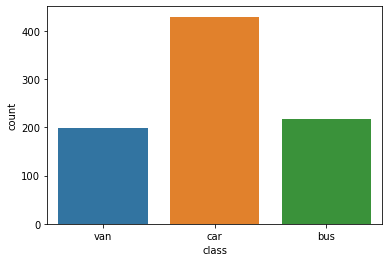

In [46]:
sns.countplot(df['class'])#plotting count of target variable

We could see that values are not well balanced dataset<br>
Car have highest number of datapoints then van and bus

In [47]:
#Label Encoding 'class' variable
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['class']=enc.fit_transform(df['class'])

Labelling the target variable 'class' with intergers using label encoder so that we could use in our model

In [48]:
#measuring skewness of data
df.skew()

compactness                    0.381271
circularity                    0.261809
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64

pr.axis_aspect_ratio, max.length_aspect_ratio and scaled_radius_of_gyration.1 are postively skewed

In [49]:
df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        845.000000     846.000000  846.000000  
mean         188.919527     195.632388    0.977541  
std            6.155809       7.438797    0.702130  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    0.000000  
50%          188.000000     197.000000    1.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

There are total 846 records but there are some missing values in the variables when we see the count of variables<br>
* 'radius_ratio' have 75% data within 195 but maximum value is 333 where there is presence of outlier or skewness
* 'scaled_variance.1' maximum value 1018 whereas 75% data is within 587
* 'max.length_aspect_ratio' have maximum value 55 where 75% data within 10
* 'skewness_about' have maximum value 22 where 75% data within 9

In [50]:
# To get total number of missing values 
missing=pd.DataFrame(df.isna().sum(),columns=["sum of missing values"])#By varaible-number of missing value
print("Total number of missing values: {} ".format(missing["sum of missing values"].sum()))#total missing value
missing

Total number of missing values: 41 


sum of missing values
compactness                                      0
circularity                                      5
distance_circularity                             4
radius_ratio                                     6
pr.axis_aspect_ratio                             2
max.length_aspect_ratio                          0
scatter_ratio                                    1
elongatedness                                    1
pr.axis_rectangularity                           3
max.length_rectangularity                        0
scaled_variance                                  3
scaled_variance.1                                2
scaled_radius_of_gyration                        2
scaled_radius_of_gyration.1                      4
skewness_about                                   6
skewness_about.1                                 1
skewness_about.2                                 1
hollows_ratio                                    0
class                                            0

Total number of missing values are 41, we could see 
* 'skewness_about' have 6 missing values
* 'circularity' have 5 missing values 
* 'distance_circularity'and 'scaled_radius_of_gyration.1 have 4 missing values
* 'pr.axis_rectangularity' and 'scaled_variance' have 3 missing values
* 'pr.axis_aspect_ratio','scaled_radius_of_gyration',scaled_variance.1 have 2 missing values
* 'scatter_ratio','elongatedness','skewness_about.1' and 'skewness_about.2' have 1 missing value


### Correlation plot for varaiables 

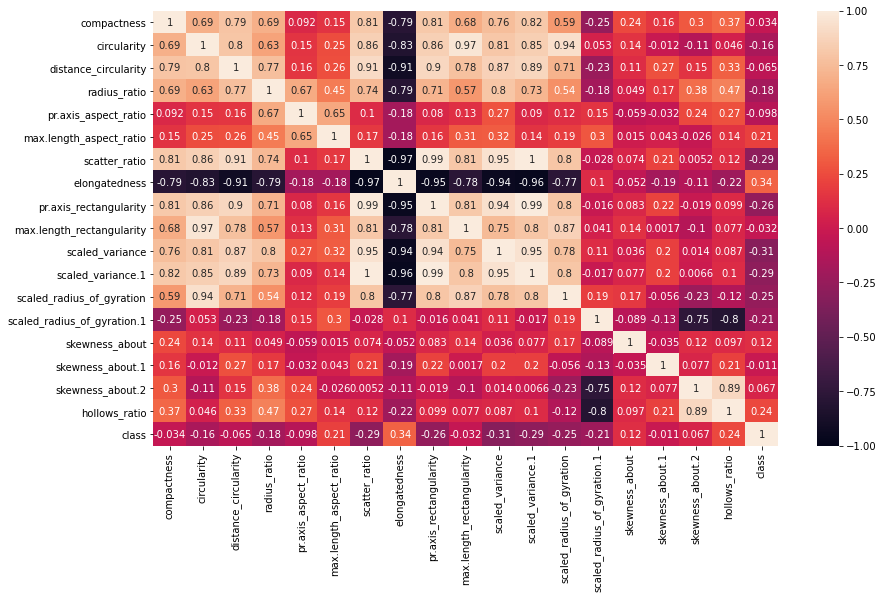

In [10]:
#Correlation Matrix
df_cor=df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(df_cor,vmax=1.0,vmin=-1.0,annot=True)

On the above correlation plot,

We could see strong negative relationship between independent variables
* 'elongatedness' have negative realtionship between 'compactness', 'circularity', distance_circularity', 'radius_ratio', scatter_ratio', 'maximum_length_rectangularity', 'scaled_variance', 'scaled_variance_1' and 'scaled_radius_of_gyration'
* 'scaled_radius_of_gyration_1' have stronnegative ralationship with 'skewnwss_about_1' and 'skewness_about_2'

Strong postive relationship are
* Correlation between 'scatter_ratio' and 'scaled_variance_1' is 1 therefore it is perfectly correlated and need to remov one independent variable
* Correlation between 'scatter_ratio' and 'pr.axis_rectangularity', 'scatter_ratio', 'distance_circularity' have strong correlation
* Correlation between 'circularity' and 'max_length_rectangularity, scaled_radius_of_gyration have strong correlation
* Correlation between 'pr.axis_rectangularity' and 'scaled_variance', 'scaled_variance_1' have strong correlation


### Pairplot to visualize the relationship of each variables

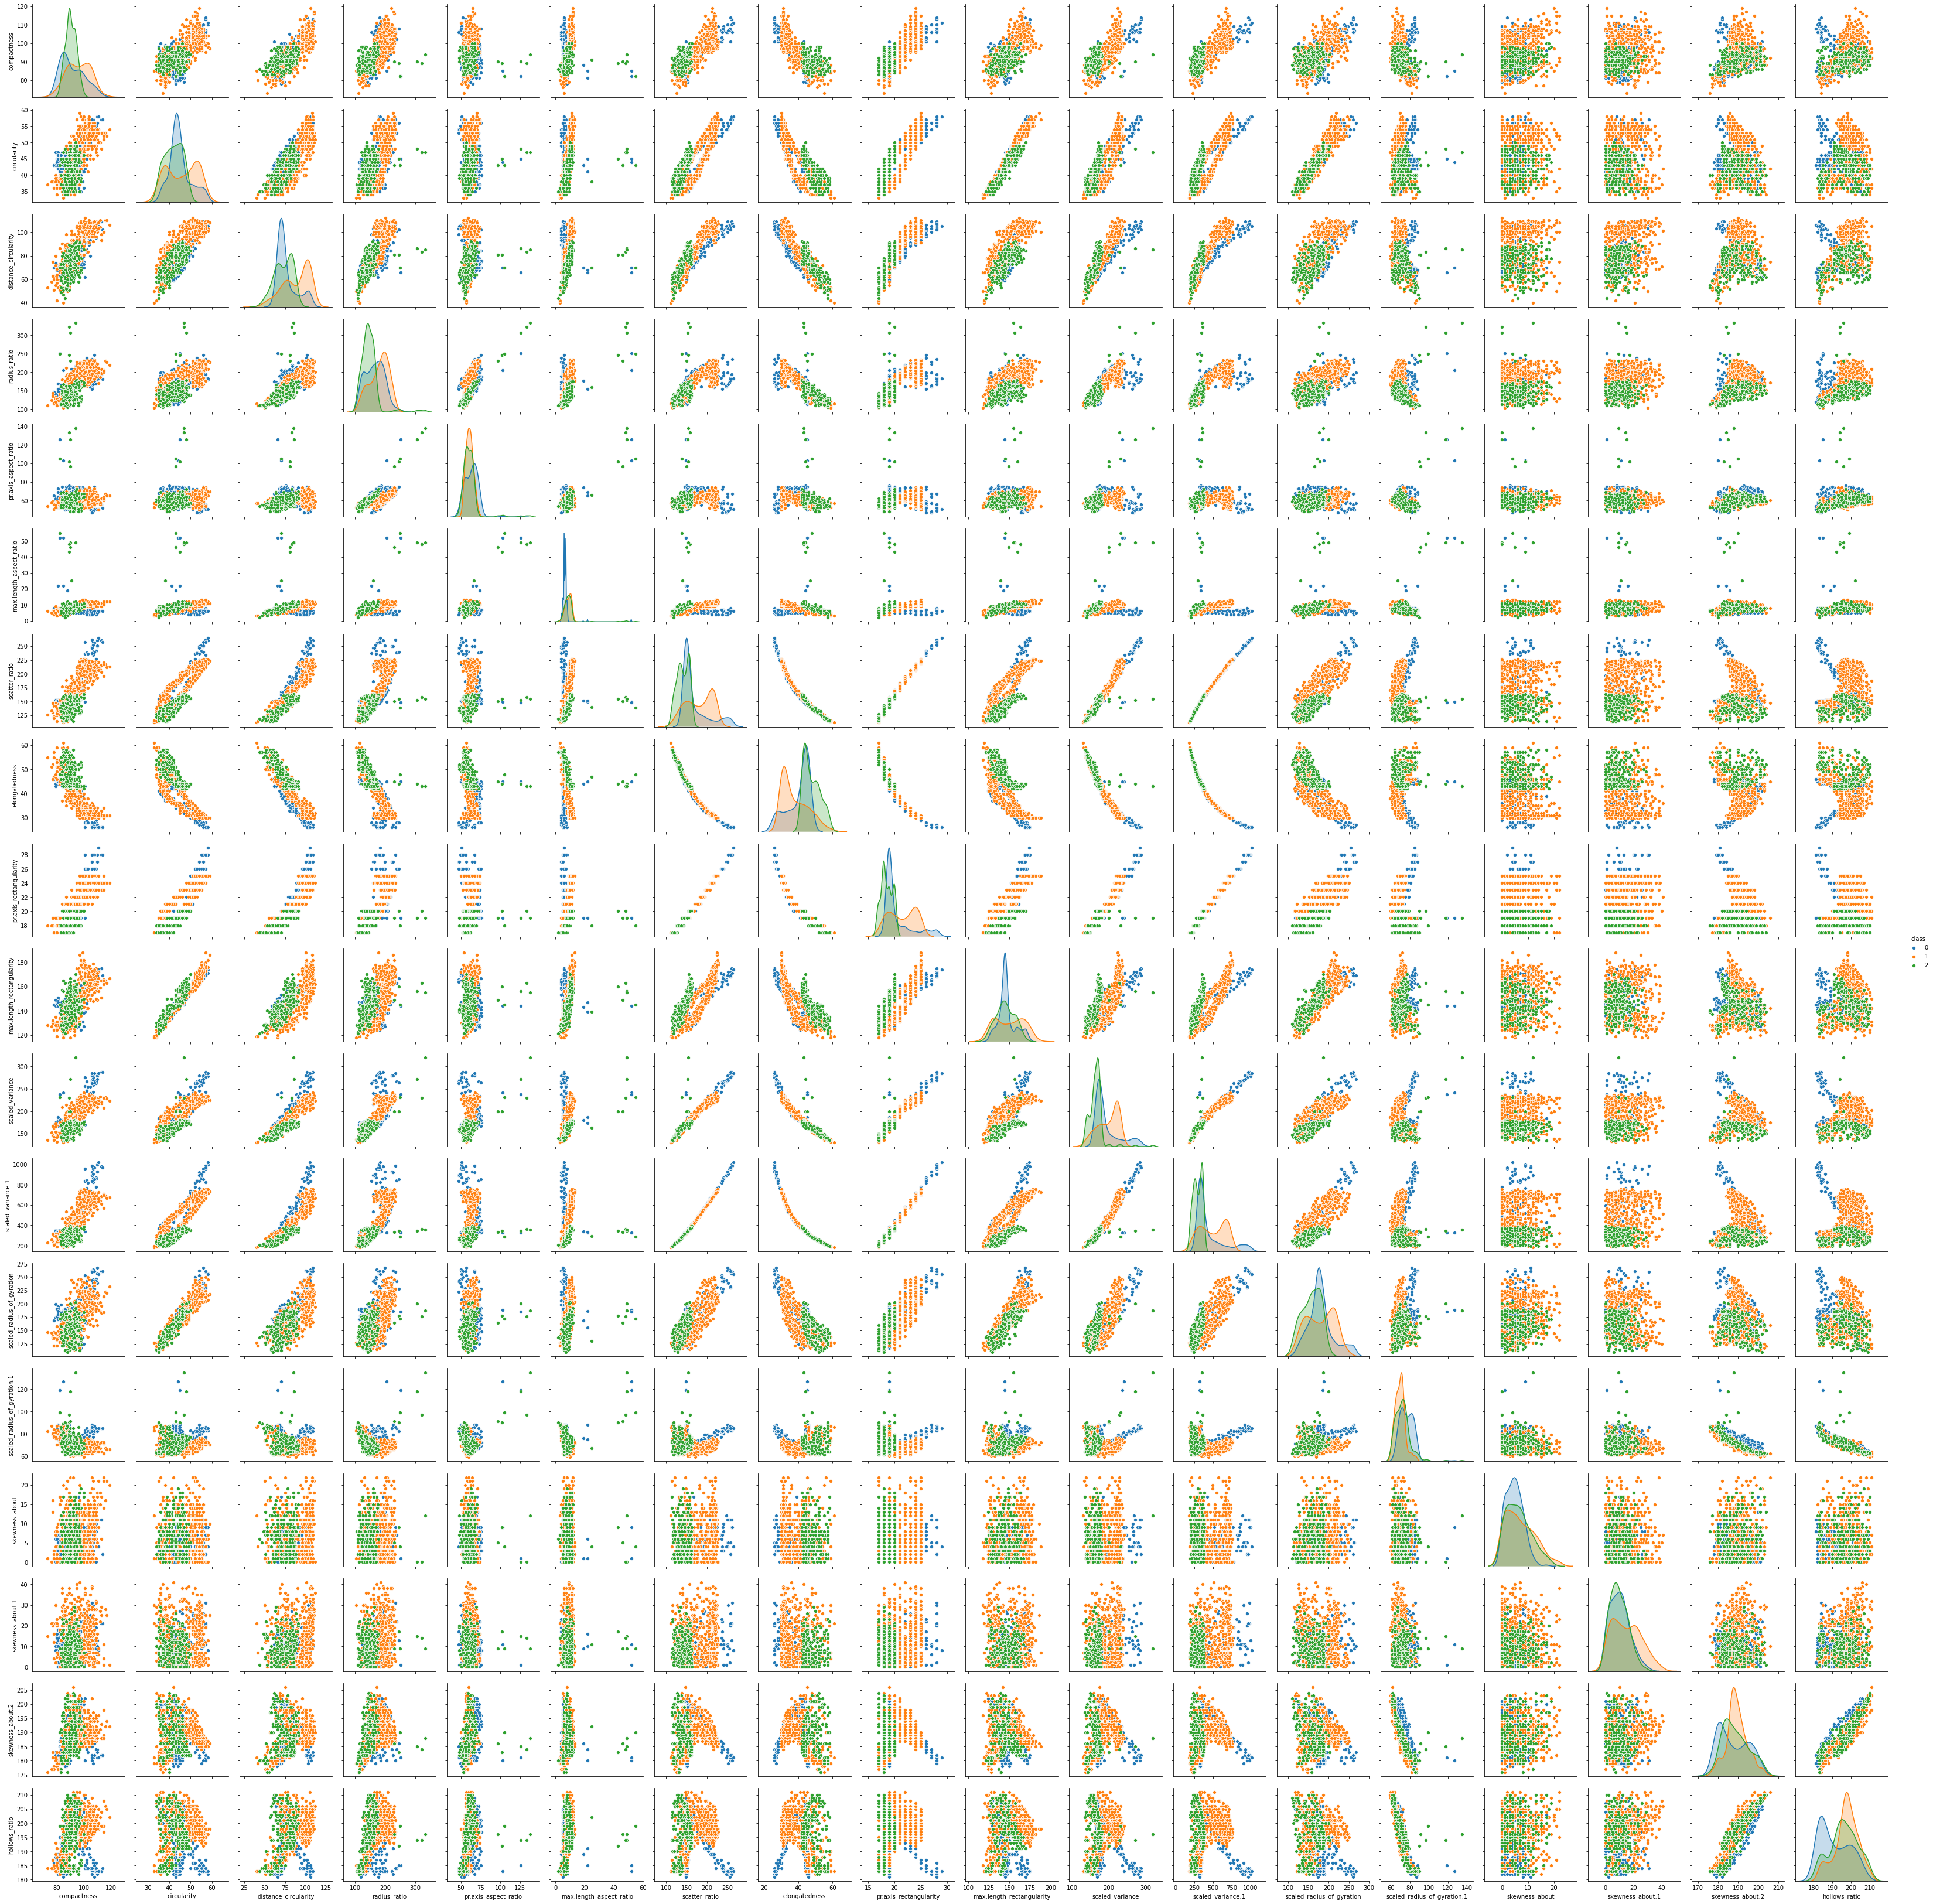

In [10]:
sns.pairplot(df,hue='class')#pairplot to visualize distribution and relationship of variables

We could see that there is perfect relationship between some independent variables as we discussed earlier in correlation plot

### Distribution plot to visualize by each class

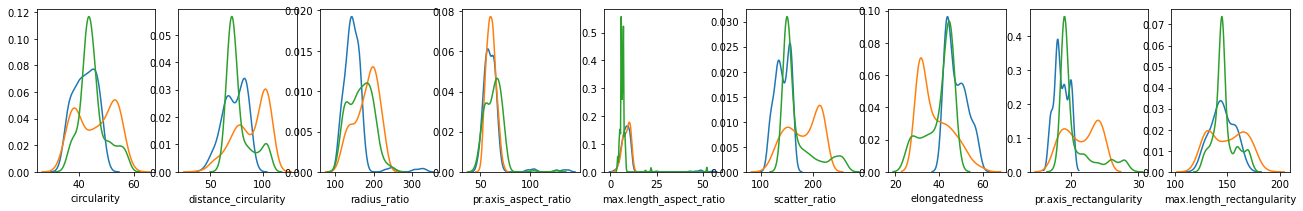

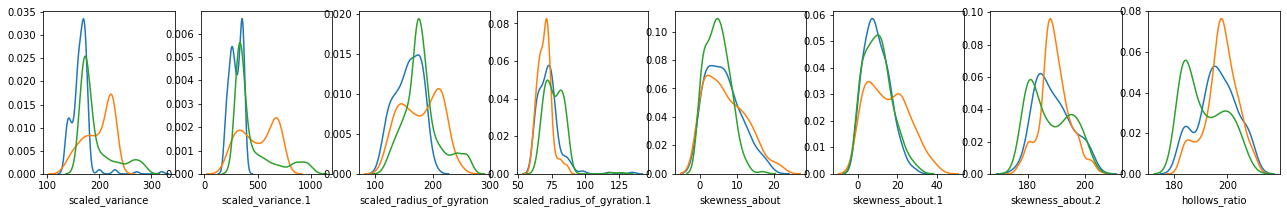

In [51]:
#Density plot for all the variables to visualize the distribution of data
df_len=df.columns
unique_vals = df['class'].unique()

# Sort the dataframe by target
# Use a list comprehension to create list of sliced dataframes
targets = [df.loc[df['class'] == val] for val in unique_vals]

# Iterate through list and plot the sliced dataframe
plt.figure(figsize=(25,3))
for i in range(1,10):
    plt.subplot(1,10,i)
    for target in targets:
        sns.distplot(target[df_len[i]], hist=False)
plt.show()

plt.figure(figsize=(25,3))
for i in range(1,9):
    plt.subplot(1,9,i)
    for target in targets:
        sns.distplot(target[df_len[i+9]], hist=False)
plt.show()

We could see that 'pr.axis_aspect_ratio','max_lenght_aspect_ratio' and 'scaled_radius_of_gyration_1' are postively skewed
Other variables are like 'scaled_variance', 'scaled_variance_1', 'elongatedness' and 'distance_circularity' have two bumps and not closely follow normal distribution

### Standardizing and Imputing Missing data

In [52]:
#Standardizing the data
X=df.drop('class', axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
XScaled=pd.DataFrame(scaler.fit_transform(X), columns = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'])
XScaled=XScaled.drop(["scatter_ratio","circularity","scaled_variance.1"],axis=1)#Removing "scaled_variance.1,"circularity","scatter_ratio"

* Removed the "scaled_variance.1" since it is perfectly correlated with "scatter_ratio"
* Removed the "scatter_ratio" since it is strongly correlated with "pr.axis_rectangularity"
* Removed the "circularity" since it is strongly correlated with "max.length_rectangularity"<br>

Transformed independent variables using standard scalar to removed the units of measurement for each independent

In [53]:
#Imputing Median values to missing values
import numpy as np
from sklearn.impute import SimpleImputer
X_df = SimpleImputer(missing_values=np.nan, strategy='median')
XScaled=pd.DataFrame(X_df.fit_transform(XScaled),columns=['compactness', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance','scaled_radius_of_gyration','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'])

Imputed the 41 missing values with the median value of the respective variable

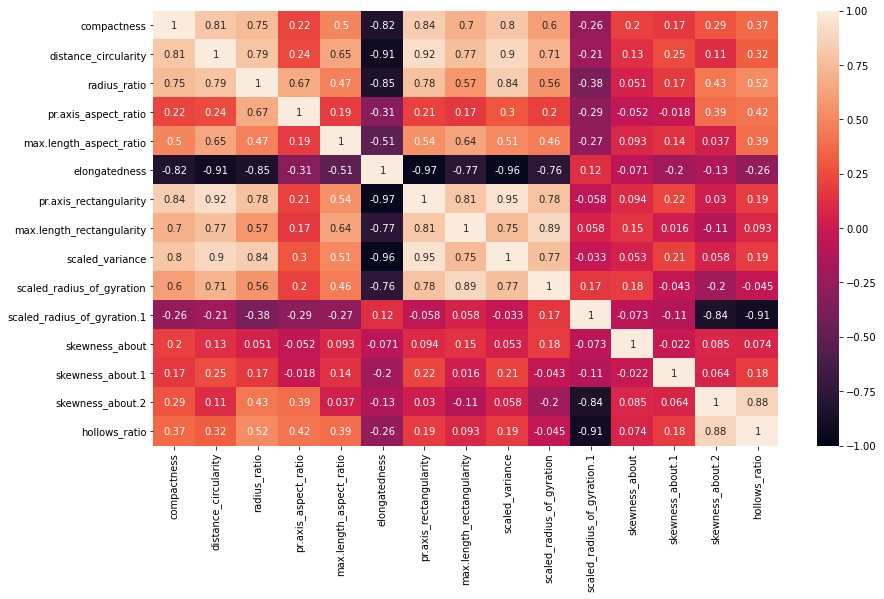

In [70]:
#Correlation plot of independent variables after removing strongly correlated variables and impution of missing variable
XScaled_cor=XScaled.corr()
plt.figure(figsize=(14,8))
sns.heatmap(XScaled_cor,vmax=1.0,vmin=-1.0,annot=True)

After removing highly correlated variables and imputing median values to missing values, correlation plot have variables which are not highly correlated and proceeding with these variables for model building which avoids the probelm of multicollinearity

### Box-plot to visualize spread and outliers of each variable

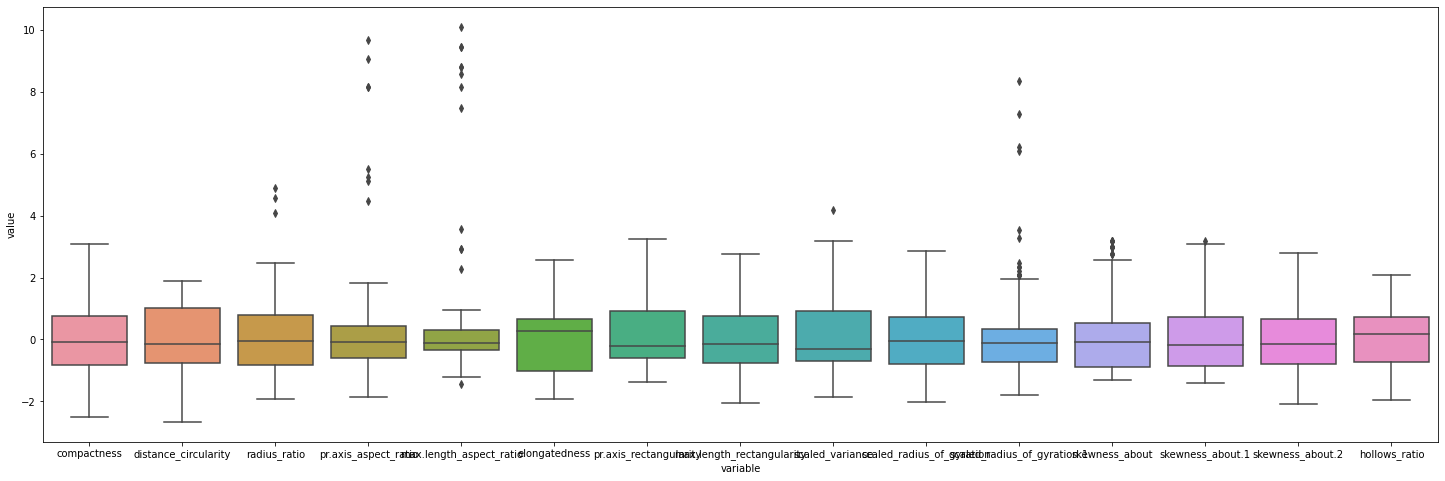

In [55]:
#Box plot to visualize outlier and spread of data
plt.figure(figsize=(25,8))
sns.boxplot(x="variable", y="value", data=pd.melt(XScaled))

We could see the presence of outlier and skweness in 'radius_ratio', 'pr.axis_aspect_ratio','max_length_aspect_ratio', 'scaled_radius_of_gyration_1'<br>
Outliers in scaled_variance 1, scaled_variance, 'skewness_about', 'skewness_about 1'

### Outlier detection and treatment with Inter-Quartile Range values

In [56]:
#Quantile based Flooring and Capping
X_col=XScaled.columns
for i in range(0,len(X_col)):
    q1=XScaled[X_col[i]].quantile(0.10)
    q3=XScaled[X_col[i]].quantile(0.90)
    XScaled[X_col[i]] = np.where(XScaled[X_col[i]] <q1, q1,XScaled[X_col[i]])#Flooring
    XScaled[X_col[i]] = np.where(XScaled[X_col[i]] >q3, q3,XScaled[X_col[i]])#Capping
print("Skewed values after Quantile based imputation for outlier")
print(XScaled.skew())

Skewed values after Quantile based imputation for outlier
compactness                    0.337143
distance_circularity           0.314408
radius_ratio                   0.008114
pr.axis_aspect_ratio           0.095448
max.length_aspect_ratio        0.245623
elongatedness                 -0.136672
pr.axis_rectangularity         0.552716
max.length_rectangularity      0.189026
scaled_variance                0.352612
scaled_radius_of_gyration      0.088008
scaled_radius_of_gyration.1    0.368332
skewness_about                 0.349256
skewness_about.1               0.310329
skewness_about.2               0.165941
hollows_ratio                 -0.353300
dtype: float64


From the above code we have done the outlier detection using 10% quantile for low values and 90% quantile for hig values<br>
For treating the outlier values, imputing high value with 90% quantile value(capping) and imputing low value with 10% quantile value (flooring)<br>

Printed skewed values after outlier imputation and we could see that the data is not skewed

### Box-plot after imputation in each variables

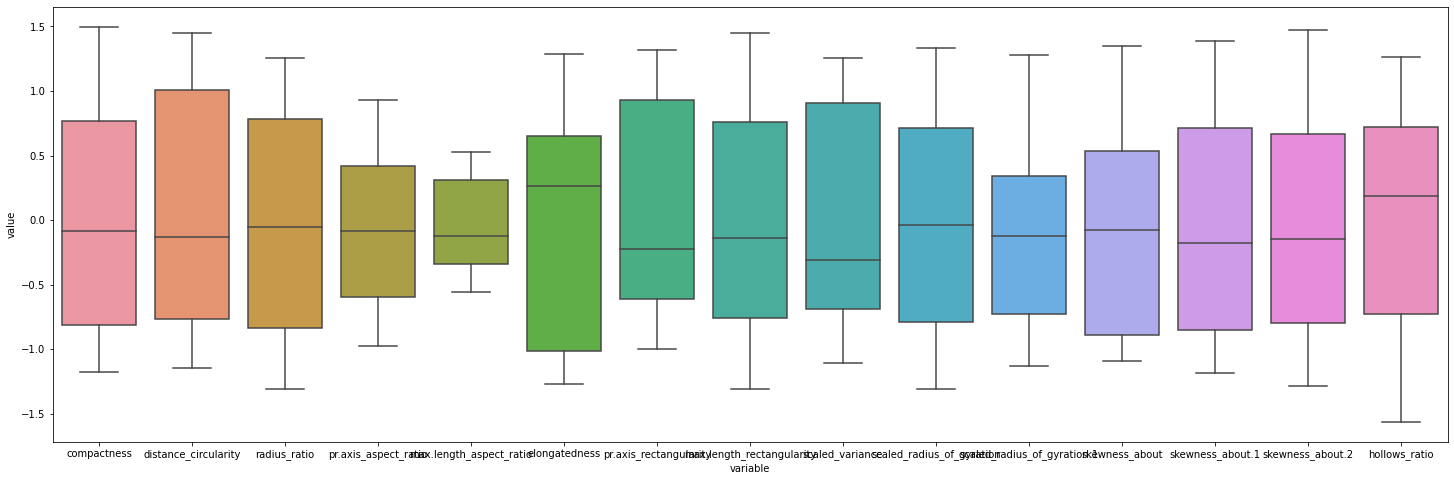

In [57]:
plt.figure(figsize=(25,8))
sns.boxplot(x="variable", y="value", data=pd.melt(XScaled))

After impution of flooring and capping values usin inter quartile range value, we could see all the values lies within the whiskers of box plot

### Splitting Train-test dataset from raw dataset

In [58]:
#Splitting of Train-Test dataset
seed=100
from sklearn.model_selection import train_test_split
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(XScaled,y, test_size = 0.3, random_state = seed)

Splitting the data with 70% train data and 30% of test data

### Fitting SVC model with Raw data

In [59]:
#fittind SVC model with the original independent variables
from sklearn.svm import SVC
svc_clf=SVC()
svc_clf.fit(X_train,y_train)
print ('Accuracy score with Original variables using train-test split: {} %'.format(np.round(svc_clf.score(X_test, y_test)*100)))

Accuracy score with Original variables using train-test split: 94.0 %


### Fitting SVC model with K-fold cross validation for raw data

In [60]:
# K-fold cross validation for Support Vector
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn import metrics
skf=KFold(n_splits=10,shuffle=True,random_state=seed)
i=1
cv_score=[]
for train,test in skf.split(XScaled,y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    train_X, test_X = XScaled.loc[train], XScaled.loc[test] 
    train_y, test_y = y.loc[train], y.loc[test]
    
    #SVC Model
    svc_clf=SVC() #call the function
    svc_clf.fit(train_X,train_y)# fit the model
    #make prediction
    svc_clf_test_pred=svc_clf.predict(test_X)
    svc_clf_train_pred=svc_clf.predict(train_X)
    score=metrics.accuracy_score(test_y,svc_clf_test_pred)
    print("Accuracy for test data: {}".format(score))
    cv_score.append(score)    
    i+=1

1 of KFold 10
Accuracy for test data: 0.9294117647058824
2 of KFold 10
Accuracy for test data: 0.9529411764705882
3 of KFold 10
Accuracy for test data: 0.9529411764705882
4 of KFold 10
Accuracy for test data: 0.9882352941176471
5 of KFold 10
Accuracy for test data: 0.9529411764705882
6 of KFold 10
Accuracy for test data: 0.9647058823529412
7 of KFold 10
Accuracy for test data: 0.9642857142857143
8 of KFold 10
Accuracy for test data: 0.9404761904761905
9 of KFold 10
Accuracy for test data: 0.9642857142857143
10 of KFold 10
Accuracy for test data: 0.9761904761904762


In [61]:
print("Mean of K-Fold Cross Validation Accuracy score with Original Variables: {} %".format(np.round(np.mean(cv_score)*100),2)) 

Mean of K-Fold Cross Validation Accuracy score with Original Variables: 96.0 %


### Building Principal Component that explains 95% variability

In [62]:
# PCA - 7 Components
pca7 = PCA(n_components=7)
pca7.fit(XScaled)

PCA(n_components=7)

In [63]:
print(pca7.components_)
print(pca7.explained_variance_ratio_)

[[ 0.33831718  0.37050378  0.33394966  0.10163307  0.10667987 -0.3703111
   0.35311176  0.32386307  0.33853057  0.29472244 -0.07857078  0.05259605
   0.07668623  0.08687749  0.15651906]
 [-0.03715511  0.03698885 -0.15102228 -0.1525923  -0.00822776 -0.06281691
   0.11379484  0.20868227  0.09739096  0.26165234  0.4523869  -0.01067641
  -0.07797327 -0.55108926 -0.54603473]
 [ 0.04768516 -0.08976016 -0.03192262  0.05543012  0.011466    0.0751943
  -0.08638852  0.18484487 -0.10467002  0.22090753 -0.06341422  0.51094941
  -0.77304564  0.11713623  0.0446583 ]
 [-0.114501   -0.06943281  0.19442942  0.30137246 -0.02846787 -0.06053728
  -0.01641559  0.00806942  0.06315422  0.04099985  0.03318173 -0.77231688
  -0.49420975  0.03051505 -0.01457373]
 [-0.1611897  -0.13394441  0.41416037  0.63308704 -0.18982267 -0.06308611
  -0.04926347 -0.29463777  0.1191633  -0.0171577   0.26072181  0.33803725
   0.12988668  0.00369568 -0.20217423]
 [ 0.41469582  0.03003349  0.0423575  -0.33997634 -0.28565994 -0.19

In [64]:
print("Cumulative variance Explained {}".format(np.cumsum(pca7.explained_variance_ratio_)))

Cumulative variance Explained [0.51720693 0.73151409 0.80914099 0.87679323 0.91499859 0.94490026
 0.9619256 ]


We selected 7 PCA components as it explains the variabilty upto 96.1 % as mentioned in above output

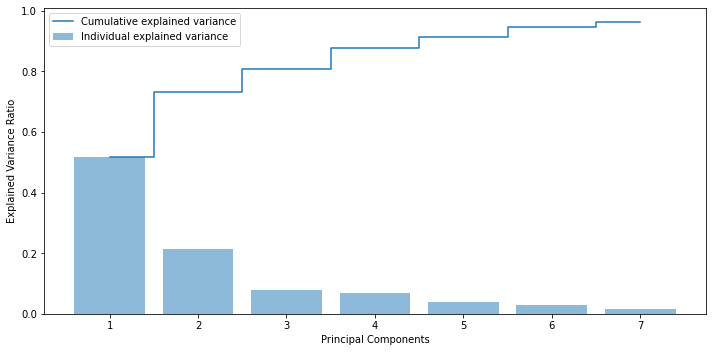

In [65]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(list(range(1,8)),pca7.explained_variance_ratio_,alpha=0.5, align='center', label = 'Individual explained variance')
plt.step(list(range(1,8)),np.cumsum(pca7.explained_variance_ratio_), where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In the above plot, <br>
1st PCA explains 51.7% variation<br>
2nd PCA explains 21.4% variation<br>
3rd PCA explains 7.7% variation<br>
4th PCA explains 6.7% variation<br>
5th PCA explains 3.8% variation<br>
6th PCA explains 2.9% variation<br>
7th PCA explains 1.7% variation<br>

Total variation explained by 7 PCA components are 96.1% 

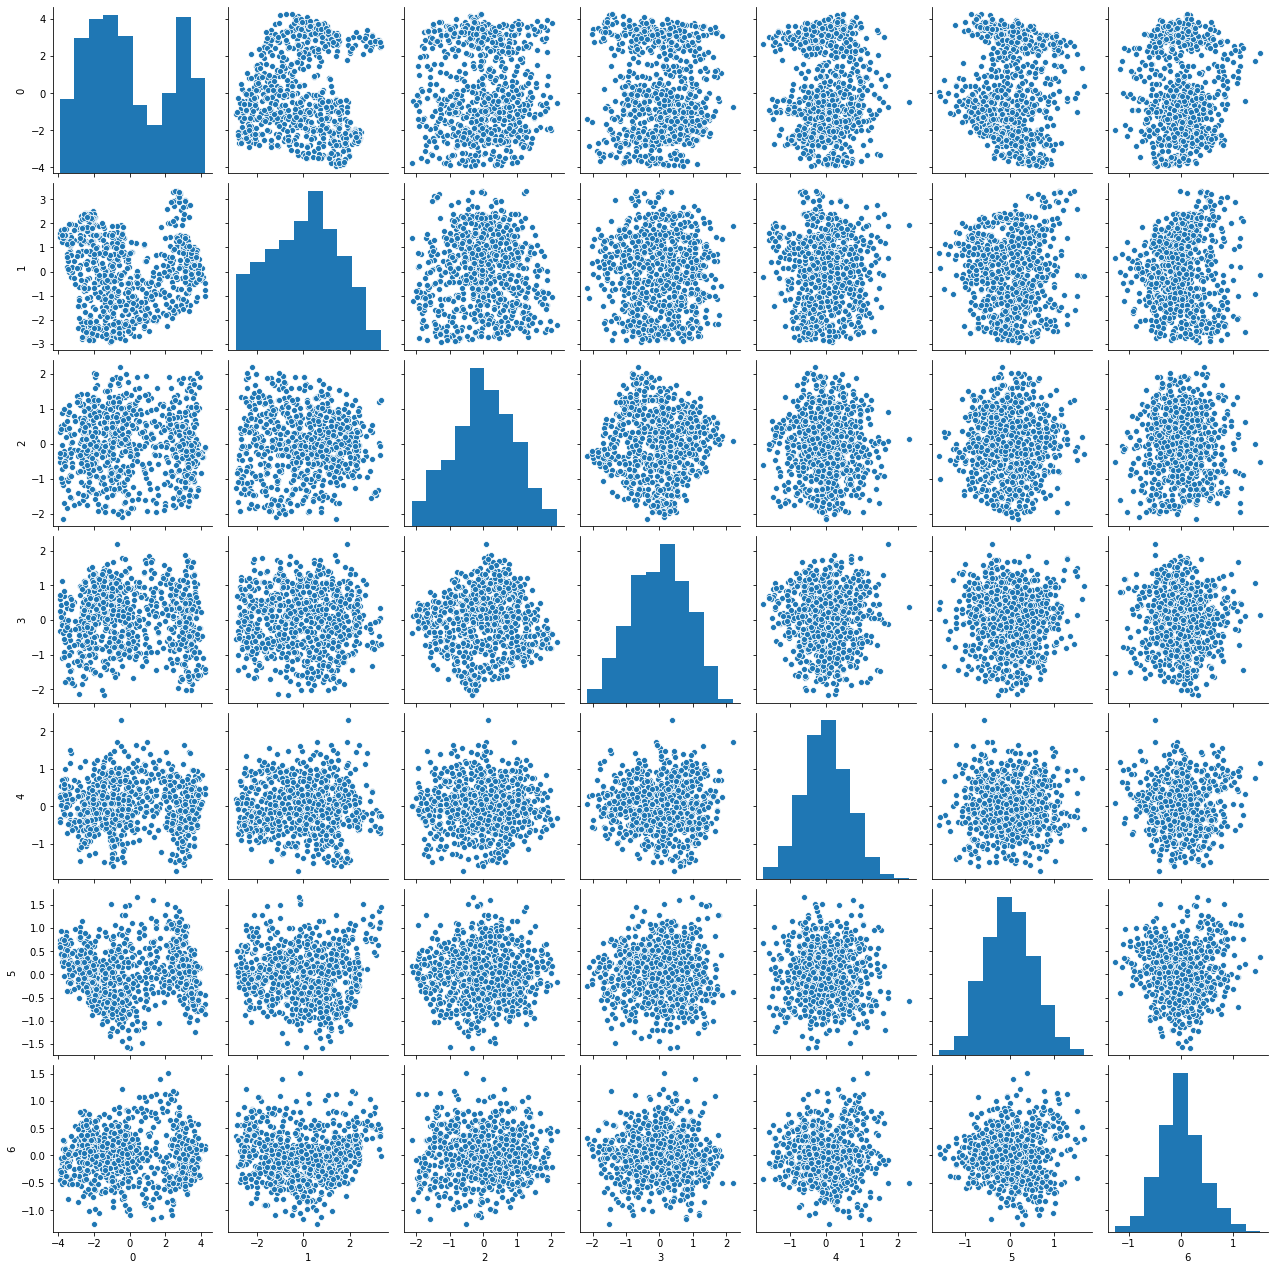

In [66]:
sns.pairplot(pd.DataFrame(Xpca7))

We could see all the variable follow normal distribution at the diagonal plots <br>
In bivariate plots, does not have any relationship with other principal components

### Fitting Support Vector Machine with PCA Components using train-test split

In [67]:
Xpca7 = pd.DataFrame(pca7.transform(XScaled))
#Train - Test dataset split
y=df['class']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca7,y, test_size = 0.3, random_state = seed)

#Fitting SVC
svc_clf.fit(X_train_pca, y_train_pca)
print ('Accuracy score with PCA components using train-test split: {} %'.format(np.round(svc_clf.score(X_test_pca, y_test_pca)*100,2)))

Accuracy score with PCA components using train-test split: 89.37 %


### Fitting Support Vector Machine with PCA Components using K-fold cross validation

In [68]:
#K-fold cross validation for Support Vector with principal components
from sklearn import metrics
skf=KFold(n_splits=10,shuffle=True,random_state=seed)
i=1
cv_score=[]
for train,test in skf.split(Xpca7,y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    train_X, test_X = Xpca7.loc[train], Xpca7.loc[test] 
    train_y, test_y = y.loc[train], y.loc[test]
    
    #SVC Model
    svc_clf_pca=SVC() #call the function
    svc_clf_pca.fit(train_X,train_y)# fit the model
    #make prediction
    svc_clf_test_pca=svc_clf_pca.predict(test_X)
    svc_clf_train_pca=svc_clf_pca.predict(train_X)
    score=metrics.accuracy_score(test_y,svc_clf_test_pca)
    print("Accuracy for test data: {}".format(score))
    cv_score.append(score)    
    i+=1

1 of KFold 10
Accuracy for test data: 0.8941176470588236
2 of KFold 10
Accuracy for test data: 0.8705882352941177
3 of KFold 10
Accuracy for test data: 0.9294117647058824
4 of KFold 10
Accuracy for test data: 0.9058823529411765
5 of KFold 10
Accuracy for test data: 0.8705882352941177
6 of KFold 10
Accuracy for test data: 0.9176470588235294
7 of KFold 10
Accuracy for test data: 0.8928571428571429
8 of KFold 10
Accuracy for test data: 0.9404761904761905
9 of KFold 10
Accuracy for test data: 0.9047619047619048
10 of KFold 10
Accuracy for test data: 0.9404761904761905


In [69]:
print("Mean of K-Fold Cross Validation Accuracy score with PCA components: {} %".format(np.round(np.mean(cv_score)*100,2)))

Mean of K-Fold Cross Validation Accuracy score with PCA components: 90.67 %


### Conclusion

From the above analysis we could get the following results,

By applying Support Vector Machine model to original variable,
* With general train test split from sklearn we could achieve 94.0% accuracy score
* With Kfold cross validation of train test split we can get 96.0% accuracy score

We have selected 7 principal components as we need to select around 96.1% variability explained components 
By applying Support Vector Machine model to principal components,
* With general train test split from sklearn we could achieve 89.3% accuracy score
* With Kfold cross validation of train test split we can get 90.6% accuracy score
Note that we have reduced from 17 independent variables in the model to 7 principal components as independent variable to the model and achieved the principal component models accurracy with trade off only 4.7% accuracy lower than raw data model using general train test split and achieved the principal component models accurracy with trade off only 5.4% accuracy lower than raw data model using k fold cross validation

This helps to build model with dimensionality reduction using principal components<br>

When We compare the above models,
By accuracy we can select the model with raw data using Kfold cross validation which attains highest test accuracy 96%<br>
If we have concerns with number of independent variables we can select 7 principal component model using Kfold cross validation which attains test accuracy 90.6%<br>
PCA component model's independent variables cannot be explained easily since it is complex combination of independent variables whereas raw data model's independent variables can be easily explained in the model